<a href="https://colab.research.google.com/github/androbaza/quantum-computing/blob/main/QComp_circuits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your first Quantum Circuits

## Libraries
So far we have only looked into Pyhton/Juypiter in general. Next we start with the proper quantum. Do to so, we must import a few important libraries/classes/functions.

In [ ]:
!pip install qiskit
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs.

In [4]:
n=4
qc_output = QuantumCircuit(n)

This circuit, which we have called `qc_output`, is created by Qiskit using `QuantumCircuit`. The `QuantumCircuit` takes the number of qubits in the quantum circuit as an argument. 

The extraction of outputs in a quantum circuit is done using an operation called `measure_all()`. Each measurement tells a specific qubit to give an output to a specific output bit. The command `qc_output.measure_all()` adds a measurement to each qubit in the circuit `qc_output`, and also adds some classical bits to write the output to.

In [5]:
qc_output.measure_all()

Qubits are always initialized to give the output ```0```. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always ```00000000```: a ```0``` from each qubit.

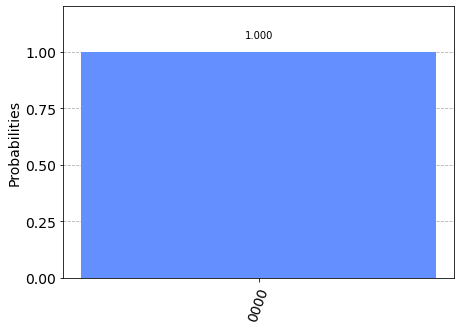

In [6]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc_output).result()
counts = result.get_counts()
plot_histogram(counts)

## Initialization of QuBits
We first import a few helpful classes into visualize the state of QuBits

In [7]:
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

We then create a single quibt circuit

In [16]:
qc = QuantumCircuit(3) # Create a quantum circuit with two qubits
initial_stateV = [0,1]   # Definean initial_state as |1>
initial_stateU = [1/sqrt(2),1/sqrt(2)]   # Definean initial_state as |1>
qc.initialize(initial_stateV, 1) # Apply initialisation operation to the 1sr qubit
qc.initialize(initial_stateU, 2) # Apply initialisation operation to the 1sr qubit
qc.draw()  # Let's view our circuit

q_0: ───────────────────────────────
           ┌─────────────────┐      
q_1: ──────┤ Initialize(0,1) ├──────
     ┌─────┴─────────────────┴─────┐
q_2: ┤ Initialize(0.70711,0.70711) ├
     └─────────────────────────────┘

### Task1: Create a balanced single-bit quantum random number generator, draw it, run it, and display the results

In [13]:
qc = QuantumCircuit(1) # Create a quantum circuit with two qubits
initial_stateV = [0,1]   # Definean initial_state as |1>
initial_stateU = [1/sqrt(2),1/sqrt(2)]   # Definean initial_state as |1>
# qc.initialize(initial_stateV, 0) # Apply initialisation operation to the 1sr qubit
qc.initialize(initial_stateU, 0) # Apply initialisation operation to the 1sr qubit
qc.draw()  # Let's view our circuit

┌─────────────────────────────┐
q: ┤ Initialize(0.70711,0.70711) ├
   └─────────────────────────────┘

## Single Qubit Gates
This is however not the preferred way of creating quanutm circuits, instead we typicall start with a |0> state and use a Hadamard-Gate (a 22.5° HWP) to create the superposition state. This time we would also like to visualize the state vector.

In [17]:
qc = QuantumCircuit(1)
qc.h(0) #Add a Hadamard Gate to the 0th Qubit
qc.save_statevector()
qc.draw()  # Let's view our circuit


┌───┐ ░ 
q: ┤ H ├─░─
   └───┘ ░

State of Measured Qubit = Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


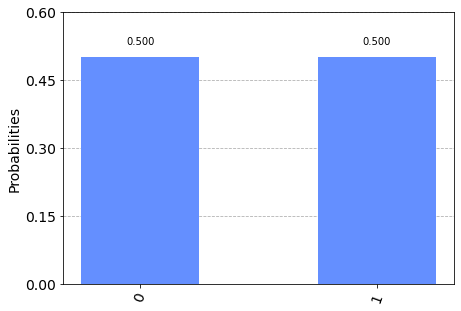

In [18]:
sim = Aer.get_backend('aer_simulator') 

result = sim.run(qc).result(); 
state = result.get_statevector()
print("State of Measured Qubit = " + str(state))

counts = result.get_counts()
plot_histogram(counts)

You see two things. First you see that the state-vector is kind of hard to visulaize and second you see that the omission of a specific measurement leads to the replacement of samples with properties. We can easily visulize teh state-vectors unsing built-in fucntions.

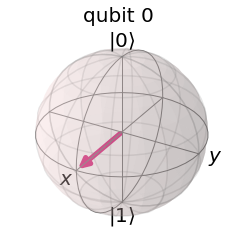

In [19]:
from qiskit.visualization import plot_bloch_multivector
plot_bloch_multivector(state)

In [21]:
import numpy as np
qc = QuantumCircuit(4)
qc.h(1) #Add a Hadamard Gate to the 1st Qubit --> diagonal polarization
qc.h(2) #Add a Hadamard Gate to the 2nd  Qubit --> diagonal polarization
qc.p(np.pi/2,2) #Add a 90 Deg Phase to the |1> part of the 2nd Quabit --> Circular Pol
qc.h(3) #Add a Hadamard Gate to the 3rd Qubit --> diagonal polarization
qc.z(3) #Add a Z- Gate to the 3rd Qubit --> inverse diagonal pol
qc.save_statevector()
qc.draw()  # Let's view our circuit

░ 
q_0: ────────────────░─
     ┌───┐           ░ 
q_1: ┤ H ├───────────░─
     ├───┤┌────────┐ ░ 
q_2: ┤ H ├┤ P(π/2) ├─░─
     ├───┤└─┬───┬──┘ ░ 
q_3: ┤ H ├──┤ Z ├────░─
     └───┘  └───┘    ░

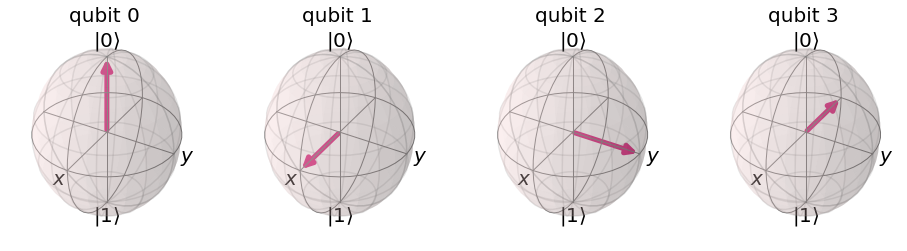

In [22]:
sim = Aer.get_backend('aer_simulator') 


result = sim.run(qc).result(); 
state = result.get_statevector()
plot_bloch_multivector(state)

## A Real Quantum Computer Experimnent
So far we have only looked at very simple simulated exampled. Now we want to execute the quanum random number generator example for real. We first must load into the networks of QCs properly.

In [25]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

IBMQ.save_account('', overwrite=True)
IBMQ.load_account()
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2022-04-24 16:00:27,154: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_belem


In [26]:
qc = QuantumCircuit(1)
qc.h(0) #Add a Hadamard Gate to the 0th Qubit
qc.measure_all()
qc.draw()  # Let's view our circuit

┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0

In [31]:
from qiskit.tools.monitor import job_monitor
qc_transpiled = transpile(qc, device, optimization_level=3)
job = device.run(qc_transpiled)
job_monitor(job, interval=2)

Job Status: job has successfully run


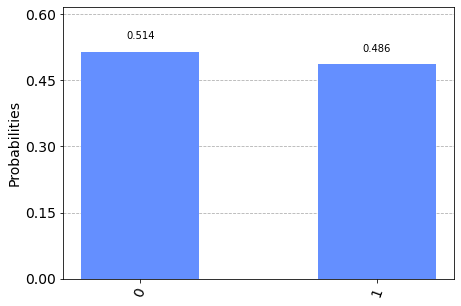

In [32]:
results = job.result()
answer = results.get_counts()
plot_histogram(answer)

## Multi-Qubit-Circuits and Entanglement
So far we have only looked into single-qubit states and hence have totally ignored the key-resource of quantum computation, that is Entanglement. We'll start out with an extremely simple example to visualize the computational power sclaing of a quanutm computer. A 4 q-bit Random number generator.

In [33]:
qc = QuantumCircuit(4)
qc.h(0) #Add a Hadamard Gate to the 0th Qubit
qc.h(1) #Add a Hadamard Gate to the 0th Qubit
qc.h(2) #Add a Hadamard Gate to the 0th Qubit
qc.h(3) #Add a Hadamard Gate to the 0th Qubit
qc.save_statevector()
qc.draw()  # Let's view our circuit

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     ├───┤ ░ 
q_3: ┤ H ├─░─
     └───┘ ░

Let's first display the state vector, which is 2^4=16 Dimensional:

In [34]:
sim = Aer.get_backend('aer_simulator') 


result = sim.run(qc).result(); 
state = result.get_statevector()
state

Statevector([0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j,
             0.25+0.j, 0.25+0.j, 0.25+0.j, 0.25+0.j],
            dims=(2, 2, 2, 2))


This 16-Dimensional State-Vector then collapses into a 4-bit number (ranging from 0 to 15) with qual probability. So each run of the circuit generates exactly one 4-bit number; their probability is: 

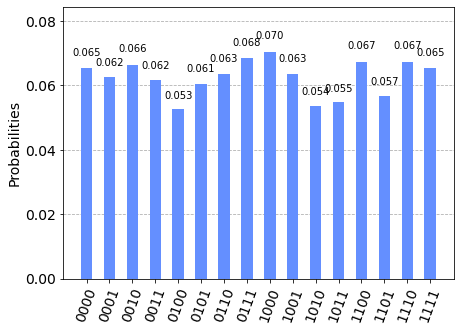

In [35]:
qc.measure_all()

sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
plot_histogram(result.get_counts())

Let's now move to entanglement and true-multi-qubit gates. The most important one is the controlled-NOT gate. It is the quantum version of the q1=q1 XOR q0 gate and it can be used to create an entangled pair, in this case a $\phi$ state

In [36]:
qc = QuantumCircuit(2)
qc.h(0) #Add a Hadamard Gate to the 0th Qubit
qc.cx(0,1) #Add a Hadamard Gate to the 0th Qubit
qc.save_statevector()
qc.draw()  # Let's view our circuit

┌───┐      ░ 
q_0: ┤ H ├──■───░─
     └───┘┌─┴─┐ ░ 
q_1: ─────┤ X ├─░─
          └───┘ ░

In [37]:
sim = Aer.get_backend('aer_simulator') 


result = sim.run(qc).result(); 
state = result.get_statevector()
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


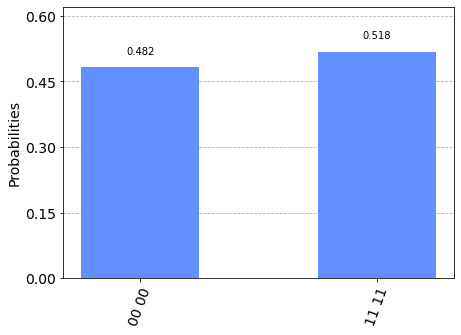

In [39]:
qc.measure_all()
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
plot_histogram(result.get_counts())

As expecte we find that the results are prefectly correlated. Either both systems meansure 0 (00) or 1 (11) but never 01 (Qubit 0 in 0 and Qubit 1 in 1) or 10.

### Task 2: Repeat the experiment from above but measure in the +/--Basis
Hint: Use the H-operator for 0/1 to +/- conversion

In [ ]:
qc = QuantumCircuit(2)
qc.h(0) #Add a Hadamard Gate to the 0th Qubit
qc.cx(0,1) #Add a Hadamard Gate to the 0th Qubit
qc.save_statevector()
qc.draw()  # Let's view our circuit

┌───┐      ░ 
q_0: ┤ H ├──■───░─
     └───┘┌─┴─┐ ░ 
q_1: ─────┤ X ├─░─
          └───┘ ░

In [ ]:
sim = Aer.get_backend('aer_simulator') 


result = sim.run(qc).result(); 
state = result.get_statevector()
state

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


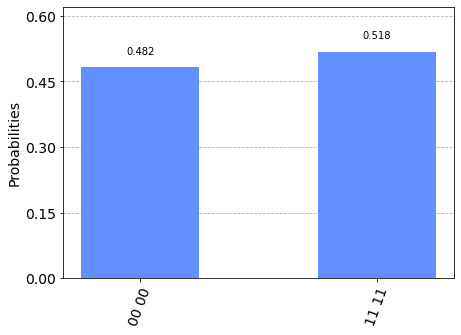

In [ ]:
qc.measure_all()
sim = Aer.get_backend('aer_simulator') 
result = sim.run(qc).result()
plot_histogram(result.get_counts())

### Task 3: Repeat the experiment from above but measure in the L/R-Basis
Hint: Use the H- and P-operator for 0/1 to L/R conversion